## Spaceship Titanic

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
pd.read_csv('sample_submission.csv').head(5) # Formato de subuida.

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [171]:
df = pd.read_csv('train.csv')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [173]:
df.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
6885,7290_03,Europa,True,D/227/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Atrino Bruthydre,True
2927,3174_01,Mars,False,D/101/P,NaN,19.0,False,155.0,0.0,1632.0,3.0,0.0,Berios Homin,True
2215,2374_01,Mars,False,E/166/S,TRAPPIST-1e,20.0,False,464.0,0.0,1432.0,0.0,0.0,Gers Sames,True
7460,7984_01,Mars,False,F/1653/P,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,Cran Birt,True
841,0904_01,Europa,False,C/33/P,TRAPPIST-1e,44.0,False,0.0,2792.0,0.0,148.0,1043.0,Wein Alcemblery,False
895,0964_02,Europa,True,B/36/P,TRAPPIST-1e,48.0,False,0.0,0.0,0.0,0.0,0.0,Weidus Platch,True
3170,3419_01,Mars,False,D/108/P,TRAPPIST-1e,47.0,False,2267.0,0.0,117.0,0.0,0.0,Blus Danad,False
4982,5315_01,Earth,False,F/1086/P,TRAPPIST-1e,18.0,False,454.0,0.0,0.0,324.0,0.0,Gwendy Toddleton,False
6586,6950_01,Europa,True,B/265/S,55 Cancri e,19.0,False,0.0,0.0,0.0,0.0,0.0,Alurops Pringry,True
8346,8922_01,Earth,True,G/1449/P,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,0.0,Walley Pager,True


### Data Preprocessing:

#### PassengerId:

 Vemos que tiene la forma *gggg_pp* donde la *g* representa el grupo en el que se encuentra el pasajero y *p* representa el número de gente del grupo. Generalmente cada grupo representa una familia. Dejamos esta parámetro para el final. Es tipo string y tiene 8693 registros.

#### HomePlanet:

Origin planet od the passenger. We've got 201 nulls in the parameter. Must create dummy variables for each planet. How should we treat category parameters in which rows this category is null?

In [174]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

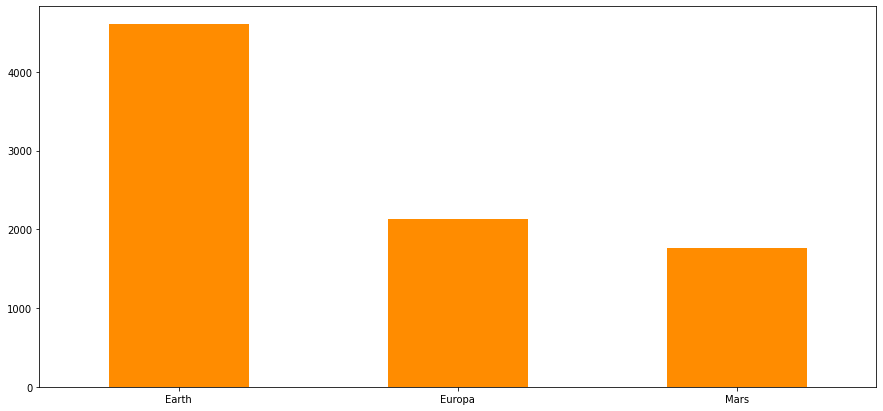

In [175]:
pd.get_dummies(df['HomePlanet']).sum().\
    plot.bar(rot=0, color = 'darkorange', figsize = (15, 7));

* Aproximetly the half of the passenger of the Titanic were from planet Earth.

In [176]:
df = pd.concat([df, pd.get_dummies(df['HomePlanet'])], axis=1).\
    drop(columns={'HomePlanet'}) # Añadimos las variables dummy a la vez que suprimimos la variable HomePlanet.

In [177]:
df.sample(10)

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
3203,3446_01,True,G/555/S,PSO J318.5-22,44.0,False,0.0,0.0,0.0,0.0,0.0,Lilasa Buckleinson,True,1,0,0
1628,1724_01,False,A/21/S,55 Cancri e,59.0,False,8.0,1563.0,0.0,73.0,31.0,Hekark Diateous,True,0,1,0
7393,7902_03,True,G/1276/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0,0.0,0.0,Jodye Georgasey,False,1,0,0
7305,7815_01,False,F/1496/S,PSO J318.5-22,27.0,False,0.0,605.0,0.0,0.0,0.0,Jaye Daviddley,True,1,0,0
2938,3188_01,True,E/209/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Mass Reau,False,0,0,1
7809,8336_01,True,E/547/S,TRAPPIST-1e,30.0,False,0.0,0.0,0.0,0.0,0.0,Minnys Sutte,True,0,0,1
7893,8429_01,True,G/1351/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Briney Donson,True,1,0,0
5515,5885_03,False,F/1123/S,TRAPPIST-1e,29.0,False,0.0,2395.0,7.0,20.0,6.0,Glena Oneiles,True,1,0,0
8613,9194_01,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False,0,0,0
814,0865_02,True,B/35/S,55 Cancri e,22.0,False,0.0,0.0,0.0,0.0,0.0,Neutria Sandul,True,0,1,0


#### Cryosleep:

Boolean variable: Here we can have the intuiton that a passenger can or can't be cryosleeped so we can create just one parameter that takes this in consideration, however, since we have nulls values in the parameter we will take both cases, so we can identify the passengers who we don't know if they were cryosleeping:

Another reflection made here is that probaly it the impact affected more to the people who weren't cryosleeping, so lets take only those cases.

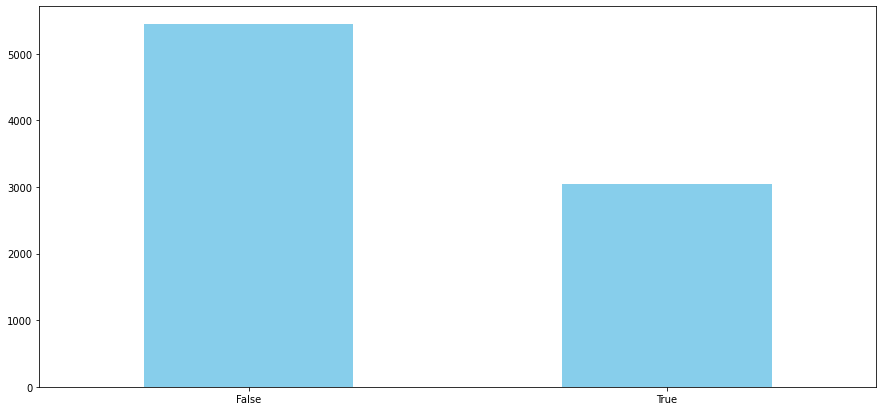

In [178]:
pd.get_dummies(df['CryoSleep']).sum().\
    plot.bar(rot=0, color = 'skyblue', figsize = (15, 7));

* Only one third of the passengers were cryosleeping

In [179]:
df = pd.concat([df, pd.get_dummies(df['CryoSleep'])], axis=1).\
    rename(columns={True:'cryosleeper', False:'no_cryosleeper'}).\
    drop(columns={'CryoSleep', 'no_cryosleeper'})
    

In [180]:
df.head(14)

,PassengerId,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,cryosleeper
0,0001_01,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0
3,0003_02,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,0
5,0005_01,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,1,0,0,0
6,0006_01,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,1,0,0,0
7,0006_02,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,1,0,0,1
8,0007_01,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,1,0,0,0
9,0008_01,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0,1,0,1


#### Cabin

From this cabin parameter we will only look if the cabin of the passenger were on the port *P* or the starboard *S*. Maybe the impact with the wormhole affected more one side of the spaceship.

Since we have null values the first steep is to treat them:

In [181]:
df['Cabin'].fillna('x/0/x', inplace = True) # cast the null values to string and the same format as the not null values in order to process them.

In [182]:
df['Side'] = [ df['Cabin'].str.split('/')[x][2] for x in range(len(df)) ]

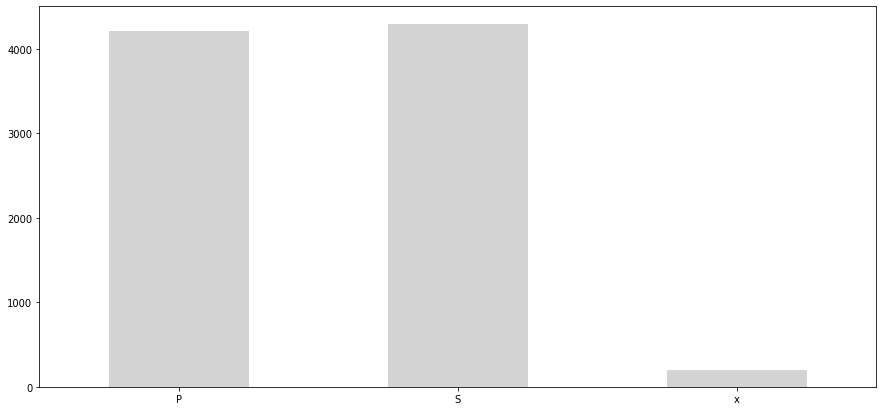

In [183]:
pd.get_dummies(df['Side']).sum().\
    plot.bar(rot=0, color = 'lightgrey', figsize = (15, 7));

* We can see how the passengers are well distribuited along the spaceship. If this parameter takes importance to the model we'll demonstrate that the impact affected one side more than the other.

In [184]:
df = pd.concat([df, pd.get_dummies(df['Side'])], axis = 1).\
    drop(columns={'Side', 'x', 'Cabin'}).\
    rename(columns={'P':'port_cabin', 'S':'starboard_cabin'})

In [185]:
df.head()

,PassengerId,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,cryosleeper,port_cabin,starboard_cabin
0,0001_01,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,1,0
1,0002_01,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,0,1
2,0003_01,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,0,1
3,0003_02,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,0,1
4,0004_01,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,0,0,1


#### Destination

We will check if the destination of the passenger was a factor in order to be affected for the impact. Since its a category we must follow the same strategy:

In [187]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [188]:
df = pd.concat([df, pd.get_dummies(df['Destination'])], axis = 1).\
    drop(columns={'Destination'}).\
    rename(columns={'TRAPPIST-1e':'destination_trappist', 'PSO J318.5-22':'destination_pso', '55 Cancri e':'destination_cancri'})

In [193]:
df.head()

,PassengerId,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,cryosleeper,port_cabin,starboard_cabin,destination_cancri,destination_pso,destination_trappist
0,0001_01,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,0,0,1,0,0,0,1
1,0002_01,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,0,0,0,1,0,0,1
2,0003_01,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,0,0,1,0,0,1
3,0003_02,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,0,0,1,0,0,1
4,0004_01,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,0,0,0,1,0,0,1


#### Age

For the age variable we'll create 'boxes' of certain ages. With these boxes we will create our categories.

In this case, in order to treat the null values we can 

In [191]:
df['Age'] = df['Age'].astype('int') # Age is an integer.

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [192]:
df.drop(columns={'Name'}, inplace=True)